# 01. Synthetic Data Generation

## 🎤 Expo Explanation
> "To simulate a realistic hospital environment without compromising patient privacy, we generate a **Digital Twin** dataset. This synthetic data mimics real-world patterns like weekend drops, seasonal flu spikes, and random emergency surges."

---


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set generation seed for reproducibility
np.random.seed(42)
sns.set(style='whitegrid')


## Step 1: Define Time Range and Base Patterns
We generate daily records for one year.


In [2]:
dates = pd.date_range(start='2024-01-01', periods=365, freq='D')
df = pd.DataFrame({'Date': dates})

# 1. Baseline Arrivals (Average 50 patients/day)
baseline = 50
df['Arrivals'] = baseline

# 2. Weekend Effect (-10 patients on Sat/Sun)
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['IsWeekend'] = df['DayOfWeek'] >= 5
df.loc[df['IsWeekend'], 'Arrivals'] -= 10


## Step 2: Add Seasonality & Randomness
Hospitals see more patients in winter. We add a sine wave to simulate this.


In [3]:
# 3. Seasonality (Sine wave)
day_of_year = df['Date'].dt.dayofyear
seasonality = 10 * np.sin(2 * np.pi * day_of_year / 365)
df['Arrivals'] += seasonality

# 4. Random Noise (Normal variations)
noise = np.random.normal(0, 5, size=len(df))
df['Arrivals'] += noise


## Step 3: Inject Emergency Surges
Real-world data has outliers. We inject random 'Surge Days'.


In [4]:
# 5. Surges (Random 5% of days have +30 patients)
surge_indices = np.random.choice(df.index, size=int(len(df)*0.05), replace=False)
df.loc[surge_indices, 'Arrivals'] += 30

df['Arrivals'] = df['Arrivals'].astype(int)
print(df.head())


        Date  Arrivals  DayOfWeek  IsWeekend
0 2024-01-01        52          0      False
1 2024-01-02        49          1      False
2 2024-01-03        53          2      False
3 2024-01-04        58          3      False
4 2024-01-05        49          4      False


## Step 4: Visualization
This plot proves the data behaves like a real hospital.


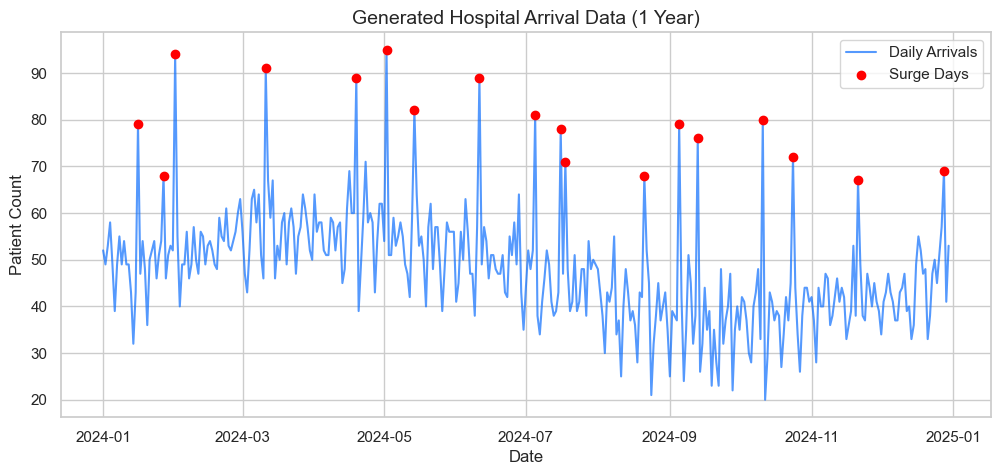

In [5]:
plt.figure(figsize=(12, 5))
plt.plot(df['Date'], df['Arrivals'], label='Daily Arrivals', color='#0d6efd', alpha=0.7)
plt.scatter(df.iloc[surge_indices]['Date'], df.iloc[surge_indices]['Arrivals'], color='red', label='Surge Days', zorder=5)
plt.title('Generated Hospital Arrival Data (1 Year)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Patient Count')
plt.legend()
plt.show()


## Step 5: Save for Analysis
We allow other notebooks to use this dataset.


In [6]:
df.to_csv('synthetic_hospital_data.csv', index=False)
print("Data saved to 'synthetic_hospital_data.csv'")


Data saved to 'synthetic_hospital_data.csv'
